# General Plan: Working on electric vehicle/public transportation usage

## Option A: Using oil price trends to see changes in trend.
## Option B: Using oil price shocks and synthetic control.

First, I will look at data to decide which option is best to take. Option B if there are isolatable shocks in some states to look at short term response of people to the shocks. If there are no isolatable shocks per state, I will switch to option A. In that, I might still use synthetic control (or if not, neighboring) to remove confounding.

On second thought, if this part of project is the study of secondary effects of predicted oil prices, it does not make sense to look at shocks because that won't come in the forecasted time series. I will only do option A.


## Specific question: Investigate whether changing crude oil prices affect people's choices of the mode of transport they use and vehicles they purchase.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os
import sys


In [96]:
acs =            pd.read_csv('data/!Spring_Invitational_2024_data/Datathon_Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv')
regional_costs = pd.read_excel('data/!Spring_Invitational_2024_data/Datathon_Data/cost_by_region.xlsx')

suffix = " Crude Oil First Purchase Price (Dollars per Barrel)"


## Examining only for Texas

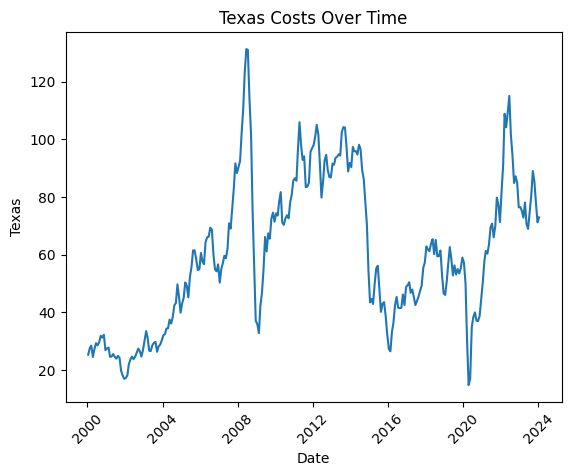

In [93]:
texas_costs = regional_costs[["Date", "Texas"+suffix]].dropna()
texas_costs = texas_costs[(texas_costs["Date"].dt.year>=2000)] #Filtering for only after 2010, as that is in ACS. Might change due to lag.

plt.plot(texas_costs['Date'], texas_costs['Texas'+suffix])
plt.title('Texas Costs Over Time')
plt.xlabel('Date')
plt.ylabel('Texas')
plt.xticks(rotation=45)
plt.show()

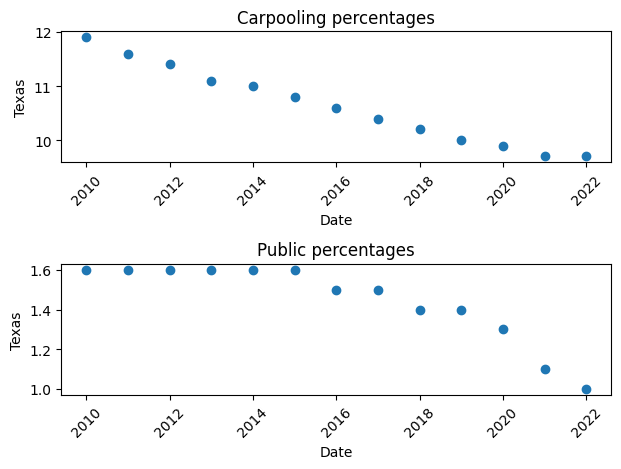

In [95]:
# Considering public/carpool percentages

acs_texas_data = acs[acs["State"] == "Texas"]
acs_texas_data.head()

texas_pc_public = acs_texas_data[acs_texas_data["Label (Grouping)"].str.contains('Public transportation')].sort_values(by='Year')
texas_pc_carpool = acs_texas_data[acs_texas_data["Label (Grouping)"].str.contains('carpooled')].sort_values(by='Year')

plt.subplot(2,1,1)
plt.scatter(texas_pc_carpool['Year'], texas_pc_carpool["Percent"].str.rstrip('%').astype(float))
plt.title('Carpooling percentages')
plt.xlabel('Date')
plt.ylabel('Texas')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
plt.scatter(texas_pc_public['Year'], texas_pc_public["Percent"].str.rstrip('%').astype(float))
plt.title('Public percentages')
plt.xlabel('Date')
plt.ylabel('Texas')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

## Unexpected! Negative correlation?

Hypothesizing this is because of high variance in crude oil prices, so people can't make decision/I am actually onto something.

Trying to see if there is a place with less variance in crude oil prices.


## Examining for some other states: 

Pennysylvania, West Virginia, Illinois, Indiana, Kansas, Kentucky, Michigan, Nebraska, North Dakota, Ohio, Oklahoma, South Dakota

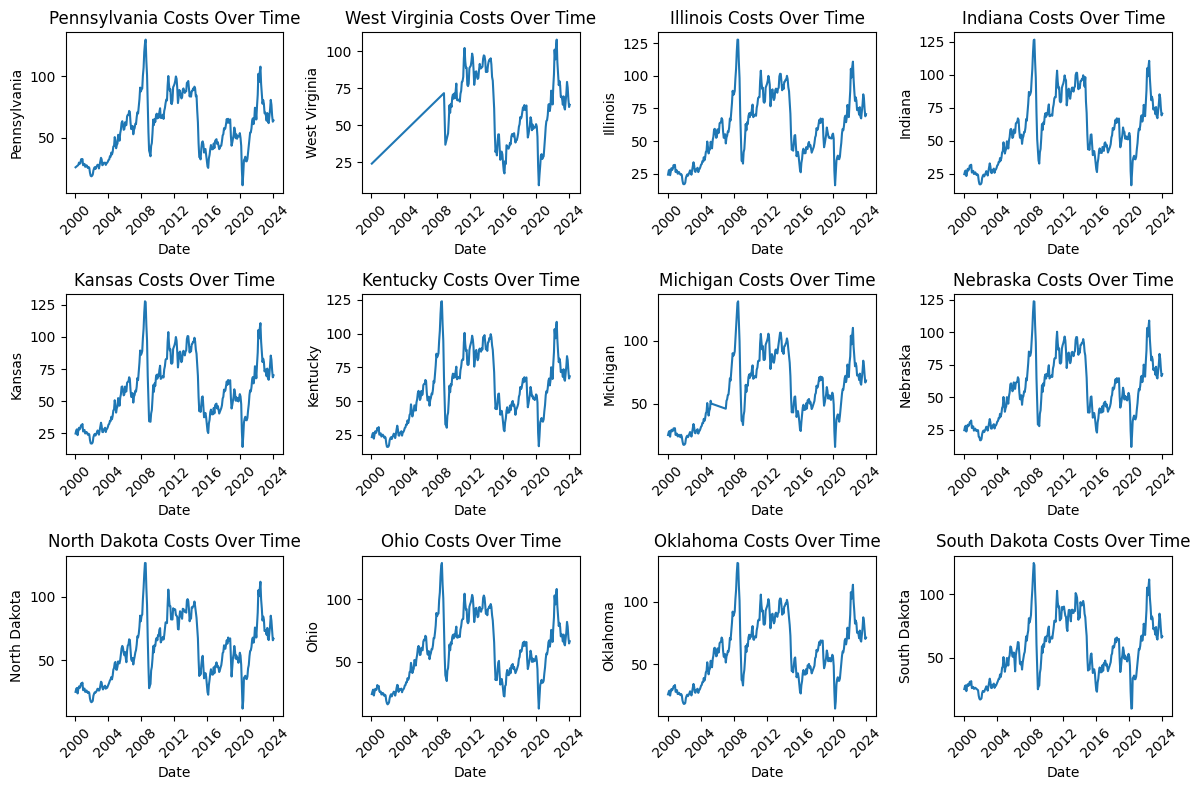

In [101]:
# Plotting their crude oil prices to gauge variability, and test my hypothesis.

states = ["Pennsylvania", "West Virginia", "Illinois", "Indiana", "Kansas", "Kentucky", "Michigan", "Nebraska", "North Dakota", "Ohio", "Oklahoma", "South Dakota"]

plt.figure(figsize=(12, 8))

for i in range(12):
    state = states[i]
    state_costs = regional_costs[["Date",state+suffix]].dropna()
    state_costs = state_costs[(state_costs["Date"].dt.year>=2000)]
    plt.subplot(3,4,i+1)
    plt.plot(state_costs['Date'], state_costs[state+suffix])
    plt.title(state+' Costs Over Time')
    plt.xlabel('Date')
    plt.ylabel(state)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
    

Well, they all look highly variable. Looking at only carpooling first for these states, and then only public:

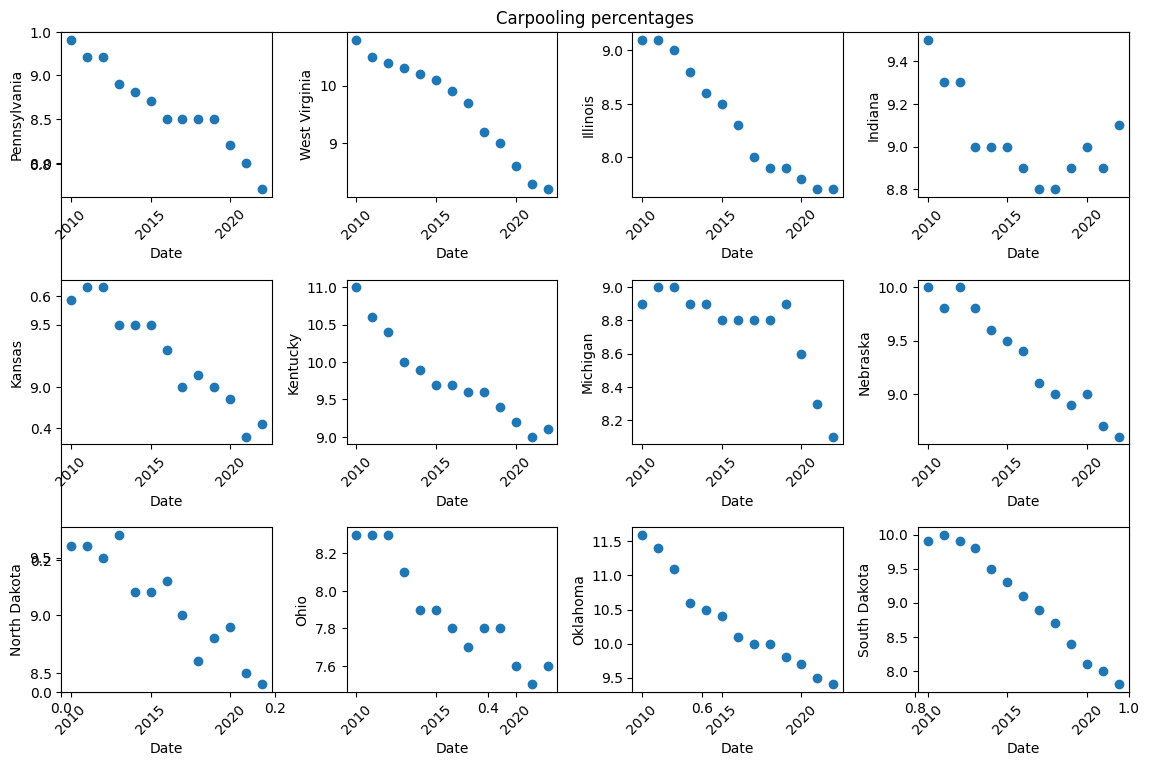

In [102]:

plt.figure(figsize=(12, 8))
plt.title('Carpooling percentages')

for i in range(12):
    state = states[i]
    state_costs = regional_costs[["Date",state+suffix]].dropna()
    state_costs = state_costs[(state_costs["Date"].dt.year>=2000)]
    plt.subplot(3,4,i+1)
    
    
    acs_state_data = acs[acs["State"] == state]
    
    state_pc_carpool = acs_state_data[acs_state_data["Label (Grouping)"].str.contains('carpooled')].sort_values(by='Year')
    
    plt.scatter(state_pc_carpool['Year'], state_pc_carpool["Percent"].str.rstrip('%').astype(float))
    
    plt.xlabel('Date')
    plt.ylabel(state)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()


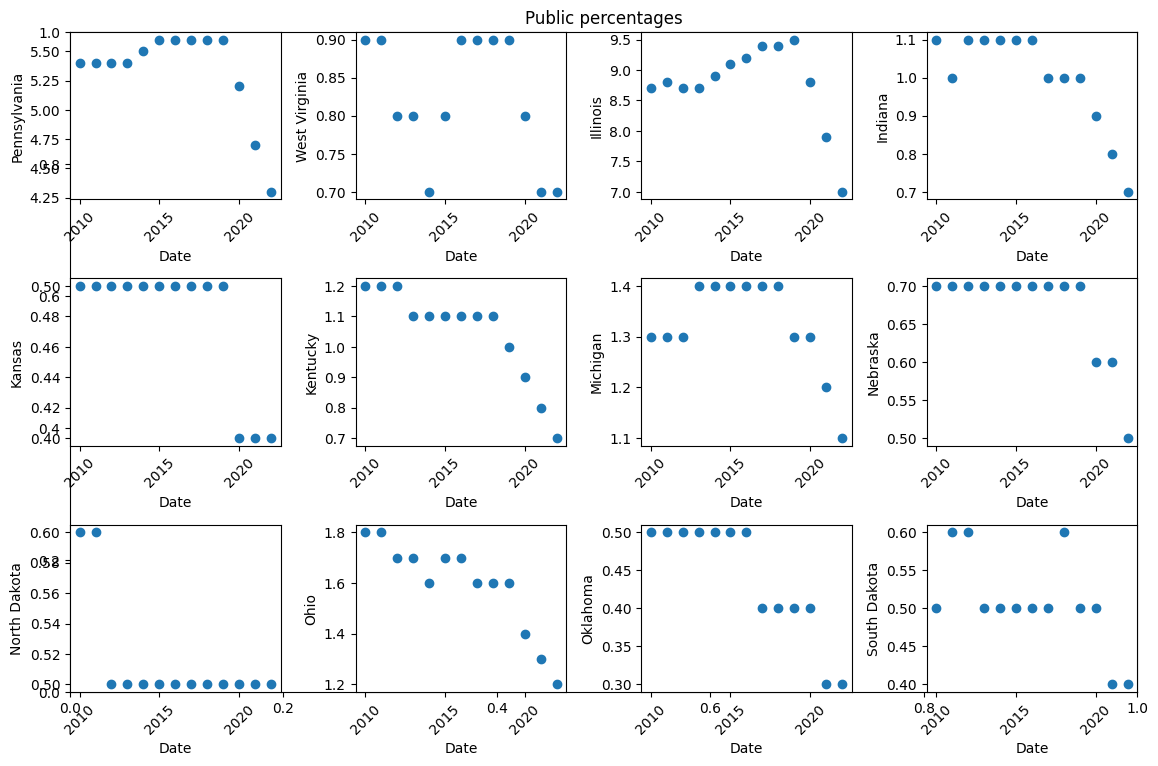

In [103]:
plt.figure(figsize=(12, 8))
plt.title('Public percentages')

for i in range(12):
    state = states[i]
    state_costs = regional_costs[["Date",state+suffix]].dropna()
    state_costs = state_costs[(state_costs["Date"].dt.year>=2000)]
    plt.subplot(3,4,i+1)
    
    
    acs_state_data = acs[acs["State"] == state]
    
    state_pc_public = acs_state_data[acs_state_data["Label (Grouping)"].str.contains('Public transportation')].sort_values(by='Year')
    
    plt.scatter(state_pc_public['Year'], state_pc_public["Percent"].str.rstrip('%').astype(float))
    
    plt.xlabel('Date')
    plt.ylabel(state)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

## Conclusions from work so far:

1. Crude oil prices in all states look EXTREMELY similar.
2. Carpooling and public usage shows NEGATIVE trend for almost all states, what can be interesting from here?
3. Public usage is not fine enough, might recalculate from public/total for each state if that is useful.

## Next step: Use electric vehicle dataset to see if anything interesting.

This website sort of already does the job, not in our format though but very useful.


https://afdc.energy.gov/transatlas#/?view=vehicle_count&state=MO&year=2016&fuel=DI

I notice that EVs are on rise and Diesel/Gasoline based vehicles are stagnated/on decline. Nevertheless number of Diesel/Gasoline vehicles in huge compared to EVs. Also this is only from 2016.


Data avaialable at Nick's recommended website: https://afdc.energy.gov/vehicle-registration